#Descargo los archivos

In [2]:
#Descargo los valores de operation

!gdown 1dJYqX6LryQcYUYPm6BDOb7Nrw2fK8vPg

#Descargo los valores de diagnostics

!gdown 1DawTQLJzLGkSWsvfuE2w-p6LMmmpqSjd

#Descargo los valores de vitals
!gdown 1Smo1dxHfpj5jFJioSOvy49F8Hd9UL8qC



Downloading...
From: https://drive.google.com/uc?id=1dJYqX6LryQcYUYPm6BDOb7Nrw2fK8vPg
To: /content/operations.csv
100% 16.3M/16.3M [00:00<00:00, 39.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DawTQLJzLGkSWsvfuE2w-p6LMmmpqSjd
To: /content/diagnosis.csv
100% 53.6M/53.6M [00:01<00:00, 41.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Smo1dxHfpj5jFJioSOvy49F8Hd9UL8qC
From (redirected): https://drive.google.com/uc?id=1Smo1dxHfpj5jFJioSOvy49F8Hd9UL8qC&confirm=t&uuid=c249ece0-d40a-4e7e-a4a5-d36926eeda47
To: /content/vitals.csv
100% 2.43G/2.43G [00:36<00:00, 67.0MB/s]


In [3]:
#Descargo los indices de los pacientes tiene 0WJG0

!gdown 19kscvi41_d22VLofFTWNY8HSxt_yCDUJ

Downloading...
From: https://drive.google.com/uc?id=19kscvi41_d22VLofFTWNY8HSxt_yCDUJ
To: /content/datos4.csv
100% 3.75k/3.75k [00:00<00:00, 10.5MB/s]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
vi_data = pd.read_csv("vitals.csv")
#vi_data
ope_data = pd.read_csv("operations.csv")
#ope_data
di_data=pd.read_csv("diagnosis.csv")

In [51]:
#158995752 es un paciente con operacion 0WJG0
paciente_pro=ope_data[ope_data['icd10_pcs'] =='0WJG0']
pacientes=paciente_pro['op_id']
pacientes_mod=pacientes.unique()

len(pacientes)

1314

In [54]:
pacientes0=paciente_pro['subject_id']
print(len(pacientes0))
pacientes_mod0=pacientes0.unique()
print(len(pacientes_mod0))

1314
1235


In [8]:
pacientes_sub=paciente_pro['subject_id']

repetidos = paciente_pro['subject_id'].value_counts()
# Filtrar los valores que se repiten
valores_repetidos = repetidos[repetidos > 1]

# Convertir a DataFrame
df_valores_repetidos = valores_repetidos.reset_index()
df_valores_repetidos.columns = ['subject_id', 'Repeticiones']

df_valores_repetidos


,subject_id,Repeticiones
0,154325270,4
1,140221034,4
2,158995752,3
3,158804801,3
4,170440613,3
...,...,...
64,157350961,2
65,192839150,2
66,116194801,2
67,137590982,2


#Creo dos dataframe basados en vitals y operations

In [9]:
#Parametros a analizar
val=vi_data['subject_id']==158995752

data1=vi_data[val]
valores_unicos = data1['item_name'].unique()
# Convertir los valores únicos en una lista
valores_unicos_lista = list(valores_unicos)
print(valores_unicos_lista)

['rr', 'nibp_sbp', 'nibp_dbp', 'nibp_mbp', 'spo2', 'o2', 'etsevo', 'etgas', 'air', 'minvol', 'vt', 'pip', 'hr', 'art_sbp', 'art_dbp', 'art_mbp', 'etco2', 'fio2', 'ns', 'cvp', 'bt', 'hs', 'hes', 'uo', 'ebl', 'rbc', 'alb20', 'nepi', 'dopai', 'ffp', 'peep']


In [10]:

paciente_info=[]

for indice in pacientes_mod:

    data_paciente = vi_data[vi_data['op_id'] == indice]
    # Iterar sobre cada valor único en la columna 'columna_a'
    promedios = []
    for valor in valores_unicos:

        # Filtrar el DataFrame para obtener solo las filas con el valor actual de 'columna_a'
        subconjunto = data_paciente[data_paciente['item_name'] == valor]
        # Calcular el promedio de los valores en 'columna_b' para este subconjunto
        promedio = subconjunto['value'].mean()
        # Agregar el promedio a la lista de promedios
        promedios.append(promedio)

    paciente_info.append(promedios)

paciente_info

df_vitals_pacientes = pd.DataFrame(paciente_info)
df_vitals_pacientes.columns= valores_unicos_lista
df_vitals_pacientes

,rr,nibp_sbp,nibp_dbp,nibp_mbp,spo2,o2,etsevo,etgas,air,minvol,...,hs,hes,uo,ebl,rbc,alb20,nepi,dopai,ffp,peep
0,13.294872,133.500000,67.000000,90.062500,99.875000,3.350000,4.000000,1.597436,0.650000,6.317949,...,125.000000,500.000000,132.500000,100.000000,0.000000,1.0,0.016667,NaN,NaN,NaN
1,NaN,130.000000,64.000000,77.000000,99.583333,0.900000,0.500000,1.325000,1.500000,NaN,...,NaN,366.666667,16.666667,200.000000,0.666667,NaN,1.818636,15.25,0.428571,NaN
2,9.519231,104.617021,69.010638,80.882979,99.215190,3.233333,2.500000,NaN,0.260000,4.046154,...,166.666667,250.000000,410.000000,500.000000,0.545455,1.0,NaN,NaN,0.384615,2.194805
3,12.916667,95.214286,67.952381,78.285714,99.047619,3.300000,1.600000,1.642105,0.250000,3.800000,...,400.000000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.027778,123.581081,62.027027,86.175676,95.000000,3.300000,1.416667,2.522222,0.333333,8.423529,...,300.000000,500.000000,50.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,10.565789,134.200000,65.400000,94.900000,99.447368,3.250000,NaN,NaN,1.500000,3.091892,...,NaN,NaN,20.000000,135.714286,NaN,NaN,NaN,NaN,NaN,5.421053
1310,9.847826,145.875000,88.000000,109.375000,99.375000,3.250000,NaN,0.400000,1.500000,3.872727,...,300.000000,NaN,50.000000,70.000000,NaN,NaN,NaN,NaN,NaN,4.695652
1311,10.782609,120.333333,59.833333,81.000000,99.280000,3.350000,NaN,NaN,1.500000,4.313043,...,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,2.041667
1312,10.673077,134.200000,73.300000,102.000000,99.849057,3.250000,NaN,NaN,1.500000,5.615385,...,100.000000,NaN,50.000000,55.000000,NaN,NaN,NaN,NaN,NaN,2.076923


In [11]:
frame=[]
for valor in pacientes_mod:
  fila=ope_data[ope_data['op_id'] == valor]
  frame.append(fila)

operation_pac = pd.concat(frame)
operation_pac

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
1,446270725,158995752,257857903,NaN,0,70,M,43.0,168.0,Asian,...,1540.0,0,70555,1345.0,1540.0,NaN,NaN,1550.0,19595.0,69860.0
35,452566478,158995752,257857903,NaN,2880,70,M,43.0,174.0,Asian,...,4015.0,0,70555,3830.0,4020.0,NaN,NaN,1550.0,19595.0,69860.0
52,440391574,192250700,291434429,NaN,1440,65,F,59.0,163.0,Asian,...,2740.0,0,31675,2355.0,2735.0,NaN,NaN,2750.0,5095.0,NaN
123,411634952,121041674,275074982,NaN,2880,60,F,43.0,157.0,Asian,...,3460.0,0,11515,3365.0,3465.0,NaN,NaN,NaN,NaN,NaN
143,442167773,144893612,280737012,NaN,0,40,M,63.0,174.0,Asian,...,450.0,0,12955,270.0,445.0,NaN,NaN,460.0,2390.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110945,487618002,186132074,263817440,-25472.0,1440,80,F,49.0,146.0,Asian,...,2330.0,0,14395,2170.0,2355.0,NaN,NaN,NaN,NaN,NaN
112059,416006595,192891843,216410186,-22950.0,1440,50,F,64.0,158.0,Asian,...,2375.0,0,10075,2265.0,2380.0,NaN,NaN,NaN,NaN,NaN
112280,428282025,173675824,270574460,-23122.0,1440,25,F,75.0,160.0,Asian,...,2145.0,0,8635,2030.0,2145.0,NaN,NaN,NaN,NaN,NaN
114063,496198262,178121234,243505343,-18019.0,2350080,70,M,60.0,158.0,Asian,...,2350960.0,2347200,2358715,2350710.0,2350965.0,NaN,NaN,NaN,NaN,NaN


In [37]:
## Crear un dataframe con columna UCI_TIME y las columnas restada

new_df = operation_pac[['subject_id','icuin_time', 'icuout_time', 'inhosp_death_time']].copy()
difference=(operation_pac['icuout_time'] - operation_pac['icuin_time'])

# Convertir NaN a cero en las columnas de tiempo de UCI y calcular UCI_TIME
UCI_time=difference.fillna(0)
new_df['UCI_TIME'] = UCI_time

# Crear la columna survival rate basada en inhosp_death_time
new_df['Survival Rate'] = np.where(new_df['inhosp_death_time'].notna(),1,0)

#new_df['inhosp_death_time'] = new_df['inhosp_death_time'].fillna(0)
new_df2= new_df.drop(columns=['icuin_time','icuout_time','inhosp_death_time'],axis=1)
# Resultado

new_df2.reset_index(drop=True, inplace=True)
new_df2

,subject_id,UCI_TIME,Survival Rate
0,158995752,18045.0,1
1,158995752,18045.0,1
2,192250700,2345.0,0
3,121041674,0.0,0
4,144893612,1930.0,0
...,...,...,...
1309,186132074,0.0,0
1310,192891843,0.0,0
1311,173675824,0.0,0
1312,178121234,0.0,0


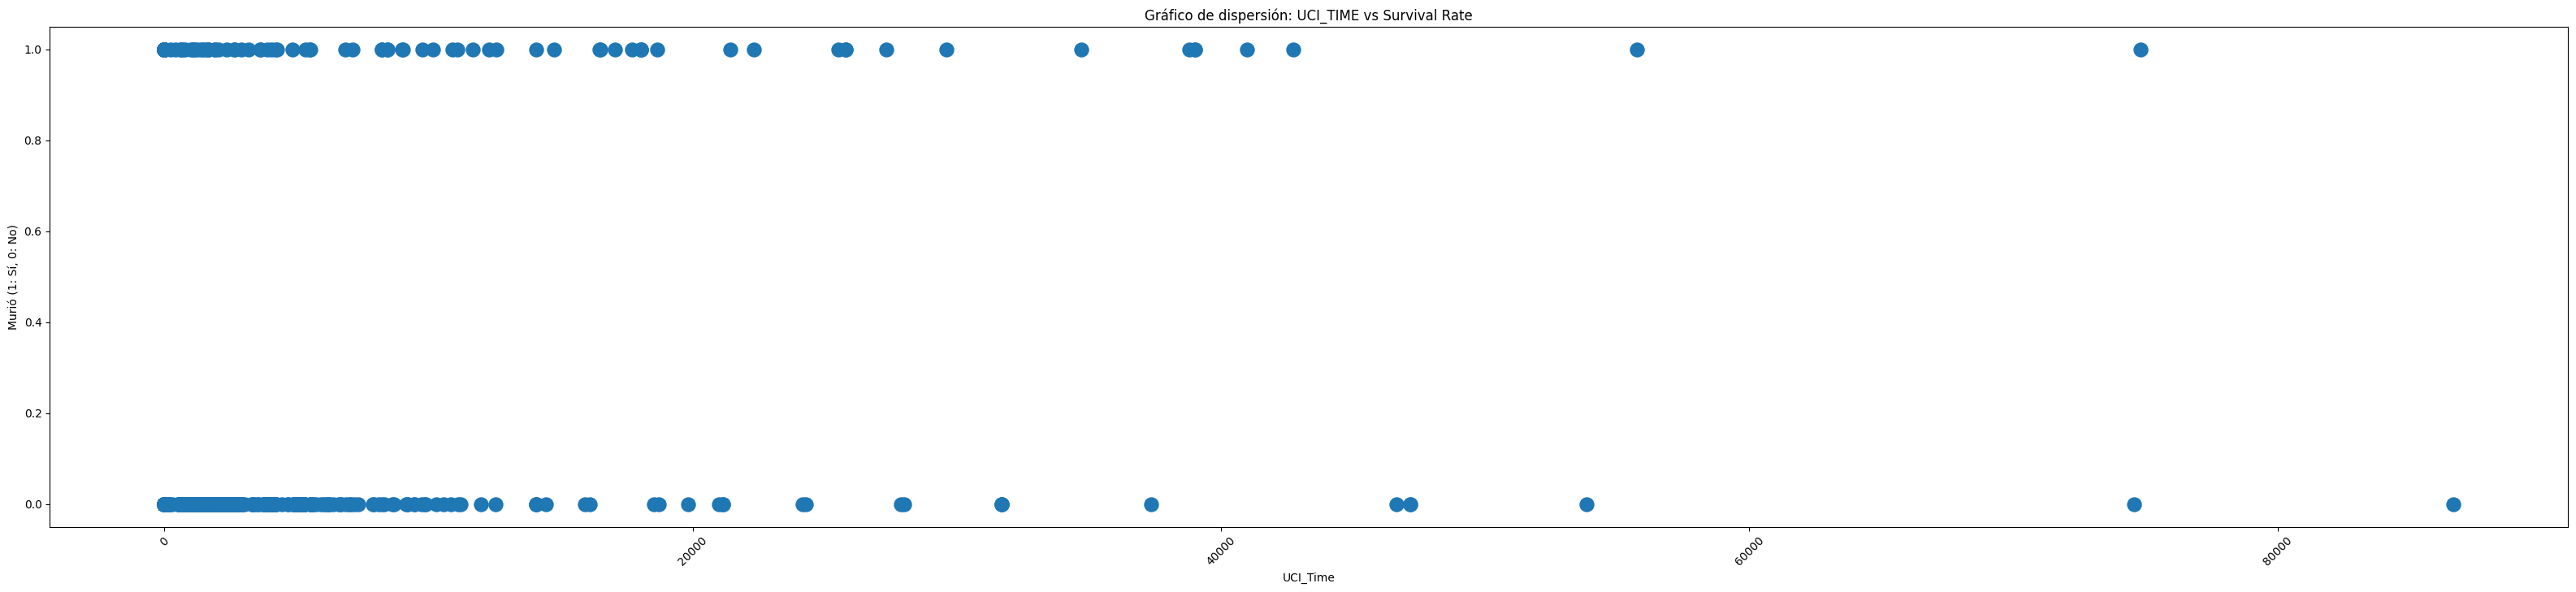

Survival Rate
0    1217
1      97
Name: count, dtype: int64

In [38]:

plt.figure(figsize=(40, 8))
plt.scatter(new_df2['UCI_TIME'], new_df2['Survival Rate'],s=150)
plt.xlabel('UCI_Time')
plt.xticks(rotation=45)
plt.ylabel('Murió (1: Sí, 0: No)')
plt.title('Gráfico de dispersión: UCI_TIME vs Survival Rate')
plt.show()

conteo = new_df2['Survival Rate'].value_counts()
conteo

#Concateno y limpio de data

In [58]:
df_concat_vitals = pd.concat([new_df2,df_vitals_pacientes], axis=1)
df_concat_vitals
#Elimino los que han tenido mas de una operación
df_concat_vitals = df_concat_vitals[~df_concat_vitals['subject_id'].duplicated(keep=False)]
df_concat_vitals

,subject_id,UCI_TIME,Survival Rate,rr,nibp_sbp,nibp_dbp,nibp_mbp,spo2,o2,etsevo,...,hs,hes,uo,ebl,rbc,alb20,nepi,dopai,ffp,peep
2,192250700,2345.0,0,9.519231,104.617021,69.010638,80.882979,99.215190,3.233333,2.500000,...,166.666667,250.0,410.000000,500.000000,0.545455,1.0,NaN,NaN,0.384615,2.194805
4,144893612,1930.0,0,15.027778,123.581081,62.027027,86.175676,95.000000,3.300000,1.416667,...,300.000000,500.0,50.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,118515241,3770.0,0,10.569444,121.000000,69.500000,88.000000,99.729730,4.300000,2.666667,...,400.000000,NaN,93.333333,40.000000,0.000000,NaN,NaN,NaN,NaN,0.400000
7,131682281,0.0,0,9.085714,120.000000,76.000000,92.250000,100.000000,2.233333,NaN,...,380.000000,NaN,72.500000,125.000000,NaN,NaN,NaN,NaN,NaN,2.028571
8,192170760,0.0,0,9.596154,122.703704,62.444444,82.481481,99.444444,2.233333,NaN,...,250.000000,NaN,20.000000,150.000000,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,186132074,0.0,0,10.565789,134.200000,65.400000,94.900000,99.447368,3.250000,NaN,...,NaN,NaN,20.000000,135.714286,NaN,NaN,NaN,NaN,NaN,5.421053
1310,192891843,0.0,0,9.847826,145.875000,88.000000,109.375000,99.375000,3.250000,NaN,...,300.000000,NaN,50.000000,70.000000,NaN,NaN,NaN,NaN,NaN,4.695652
1311,173675824,0.0,0,10.782609,120.333333,59.833333,81.000000,99.280000,3.350000,NaN,...,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,2.041667
1312,178121234,0.0,0,10.673077,134.200000,73.300000,102.000000,99.849057,3.250000,NaN,...,100.000000,NaN,50.000000,55.000000,NaN,NaN,NaN,NaN,NaN,2.076923


In [60]:
# Contar los valores NaN por columna
nan_counts = df_concat_vitals.isna().sum()

print(nan_counts)

subject_id          0
UCI_TIME            0
Survival Rate       0
rr                 20
nibp_sbp           34
nibp_dbp           34
nibp_mbp           32
spo2                0
o2                 18
etsevo            543
etgas             431
air                19
minvol             61
vt                 17
pip                17
hr                  0
art_sbp           271
art_dbp           273
art_mbp           265
etco2               7
fio2              114
ns                747
cvp               802
bt                 19
hs                132
hes               631
uo                135
ebl               151
rbc               790
alb20            1083
nepi             1066
dopai            1129
ffp              1075
peep              374
dtype: int64


In [61]:
df_filt=df_concat_vitals.drop(columns=['etsevo','etgas','art_sbp','ns','cvp','hes','rbc','alb20','nepi','dopai','ffp'])
df_filt1 = df_filt.dropna()
df_filt1

,subject_id,UCI_TIME,Survival Rate,rr,nibp_sbp,nibp_dbp,nibp_mbp,spo2,o2,air,...,hr,art_dbp,art_mbp,etco2,fio2,bt,hs,uo,ebl,peep
2,192250700,2345.0,0,9.519231,104.617021,69.010638,80.882979,99.215190,3.233333,0.260000,...,95.714286,52.346667,66.181818,30.506757,53.297297,34.727778,166.666667,410.0,500.000000,2.194805
7,131682281,0.0,0,9.085714,120.000000,76.000000,92.250000,100.000000,2.233333,0.333333,...,53.166667,70.529412,91.705882,30.471429,46.068571,36.343750,380.000000,72.5,125.000000,2.028571
10,187096493,0.0,0,9.734043,125.857143,81.500000,95.428571,99.979167,3.350000,0.650000,...,78.833333,71.043478,94.826087,30.636364,46.840909,36.476190,333.333333,15.0,133.333333,0.042553
12,189326404,0.0,0,10.820000,132.583333,79.666667,101.083333,98.920000,1.085714,0.350000,...,93.666667,67.636364,82.583333,34.227273,44.181818,32.095652,110.000000,120.0,125.000000,0.130435
13,152129940,0.0,0,9.120000,138.333333,70.166667,91.833333,99.961538,0.766667,0.166667,...,57.076923,68.695652,93.565217,32.195652,51.391304,35.436364,94.444444,55.0,95.000000,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,107979743,0.0,0,10.000000,110.166667,60.500000,75.416667,100.000000,3.250000,1.500000,...,76.074074,64.869565,71.407407,27.750000,45.100000,35.795000,175.000000,90.0,40.000000,4.750000
1306,134061920,795.0,0,14.461538,124.000000,65.187500,85.375000,100.000000,0.500000,1.500000,...,53.565217,47.121212,69.666667,36.861538,33.938462,35.674194,150.000000,130.0,177.777778,5.107692
1310,192891843,0.0,0,9.847826,145.875000,88.000000,109.375000,99.375000,3.250000,1.500000,...,73.148936,78.095238,98.545455,31.500000,44.333333,36.341176,300.000000,50.0,70.000000,4.695652
1312,178121234,0.0,0,10.673077,134.200000,73.300000,102.000000,99.849057,3.250000,1.500000,...,52.761905,56.117647,76.039216,31.596154,42.748000,36.169565,100.000000,50.0,55.000000,2.076923


#Analizo mi dataframe final

In [62]:
conteo = df_filt1['Survival Rate'].value_counts()
conteo

Survival Rate
0    409
1     17
Name: count, dtype: int64

In [64]:
# Contar cuántos valores son cero
count_zero = (df_filt1['UCI_TIME'] == 0).sum()

# Contar cuántos valores son diferentes de cero
count_non_zero = (df_filt1['UCI_TIME'] != 0).sum()

# Mostrar los resultados
print(f"Cantidad de pacientes que NO entraron a UCI: {count_zero}")
print(f"Cantidad de pacientes que entraron a UCI: {count_non_zero}")

Cantidad de pacientes que NO entraron a UCI: 314
Cantidad de pacientes que entraron a UCI: 112


#Modelo de regresión lineal

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


In [66]:
#Realizo ML de clasificación:

X = df_filt1.drop(columns=['UCI_TIME','Survival Rate','subject_id'])
y = df_filt1[['UCI_TIME']]

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regresión Lineal
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear = linear_reg.predict(X_test_scaled)
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R2 Score:", r2_score(y_test, y_pred_linear))


Linear Regression
Mean Squared Error: 36277237.88037199
R2 Score: 0.11202920477162615


#Matriz de correlación

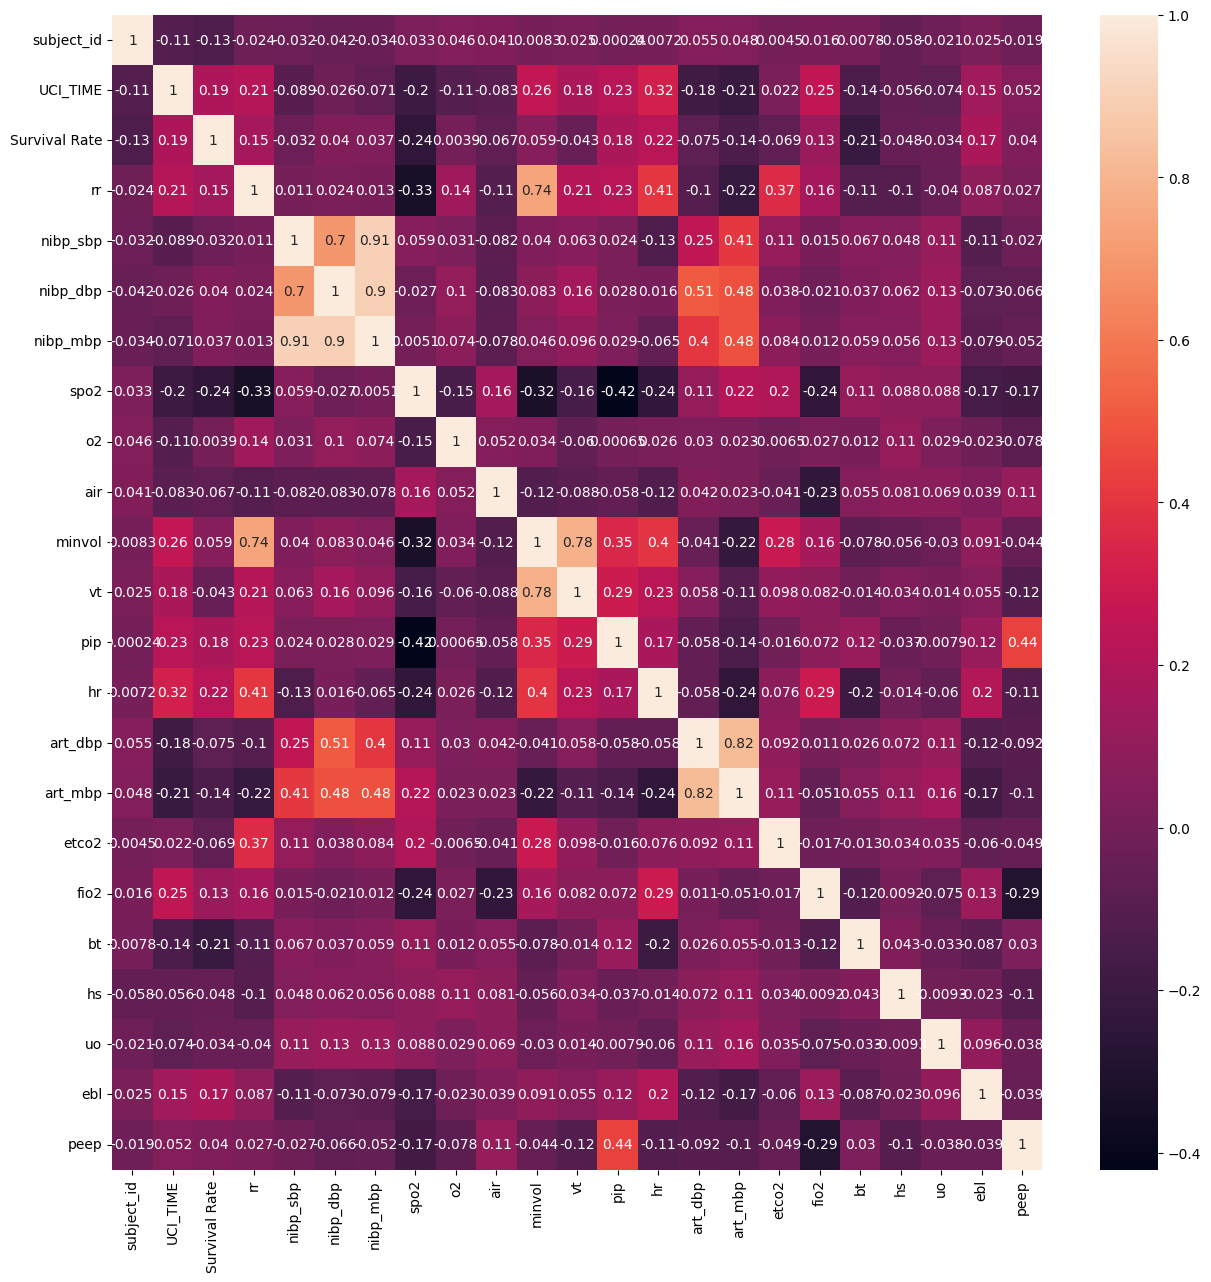

In [67]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


df_scaled = pd.DataFrame(scaler.fit_transform(df_filt1), columns=df_filt1.columns)

# Calcular la matriz de correlación
correlation_matrix = df_scaled.corr()


# Entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Visualizar la matriz de correlación con un heatmap

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
#df_scaled

#Plots usando StandartScale

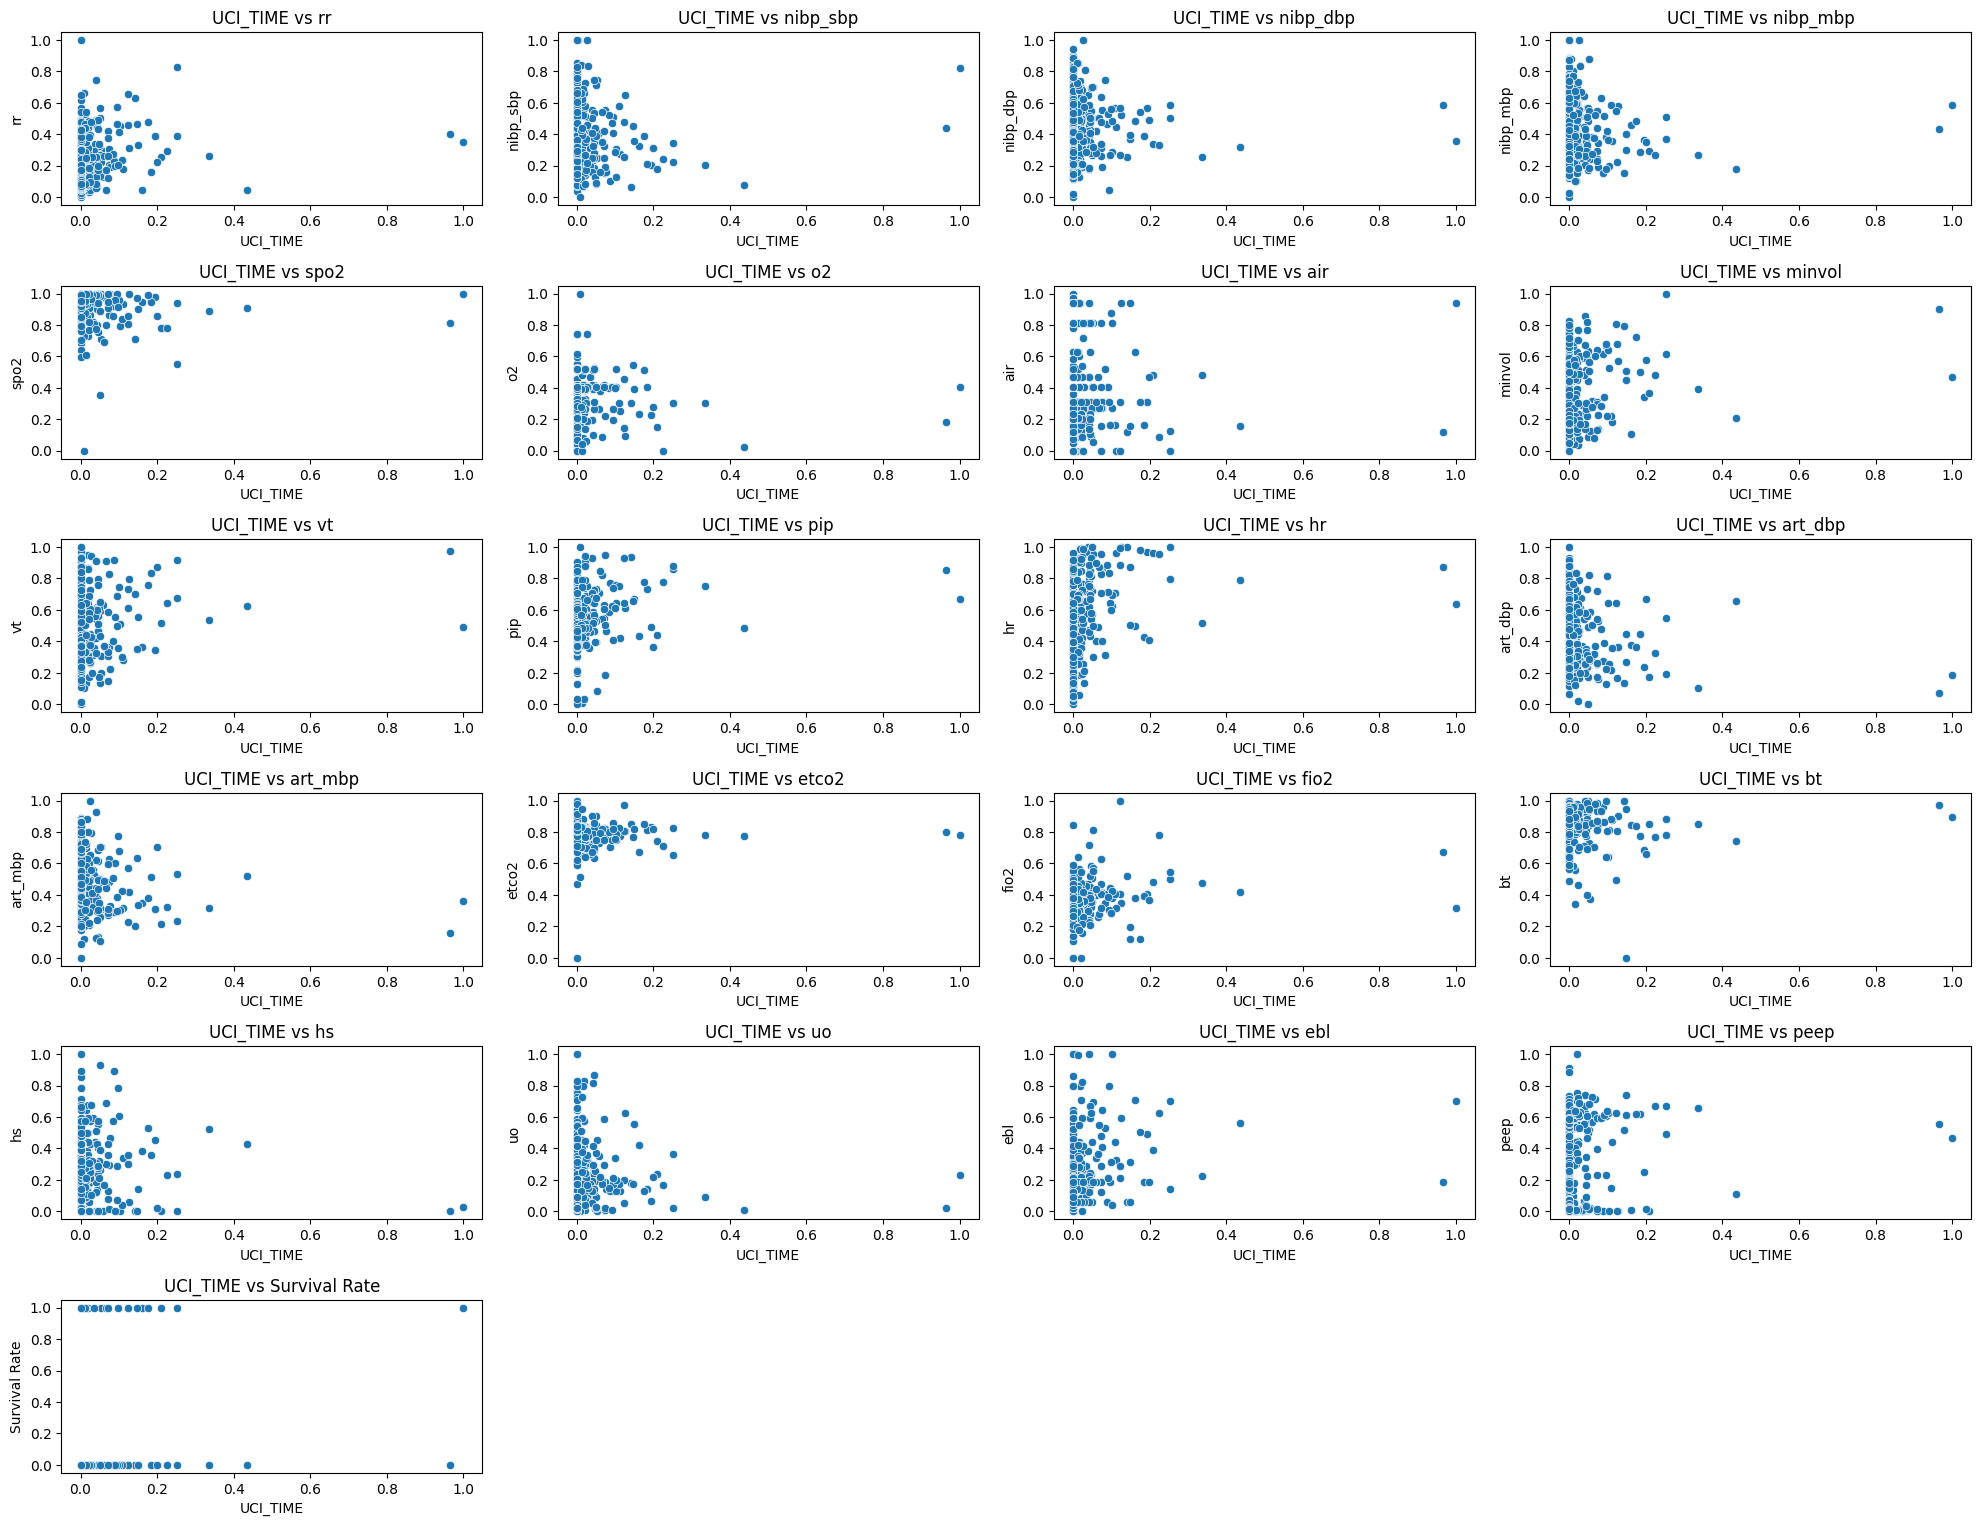

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Usando MinMaxScaler
scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df_filt1), columns=df_filt1.columns)

target_column = 'UCI_TIME'

# Configurar el número de filas y columnas para la cuadrícula
num_cols =4
num_rows =8

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

# Crear scatter plots de la columna objetivo contra todas las demás columnas
plot_index = 0
for column in df_minmax_scaled.columns:
    if column != target_column:
        sns.scatterplot(ax=axes[plot_index], x=df_minmax_scaled[target_column], y=df_minmax_scaled[column])
        axes[plot_index].set_title(f'{target_column} vs {column}')
        axes[plot_index].set_xlabel(target_column)
        axes[plot_index].set_ylabel(column)
        plot_index += 1

# Desactivar los subplots vacíos
for j in range(plot_index, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Modelo de SVM, KNN y DT

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [69]:


X = df_filt1.drop(columns=['UCI_TIME','Survival Rate','subject_id'])
#y = df_filt1[['Survival Rate']]
y = (df_filt1['UCI_TIME'] != 0).astype(int)


# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Clasificación con SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        64
           1       0.80      0.55      0.65        22

    accuracy                           0.85        86
   macro avg       0.83      0.75      0.78        86
weighted avg       0.84      0.85      0.84        86



In [70]:
# Clasificación con K-Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("K-Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        64
           1       0.90      0.41      0.56        22

    accuracy                           0.84        86
   macro avg       0.86      0.70      0.73        86
weighted avg       0.85      0.84      0.81        86



In [73]:

# Crea el modelo de árbol de decisión
dt_model = DecisionTreeClassifier()

# Entrena el modelo con los datos de entrenamiento
dt_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)


print("K-Neighbors Classification Report:")
print(classification_report(y_test, y_pred_dt))

K-Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        64
           1       0.35      0.32      0.33        22

    accuracy                           0.67        86
   macro avg       0.56      0.56      0.56        86
weighted avg       0.66      0.67      0.67        86



#Analisis de los modelos

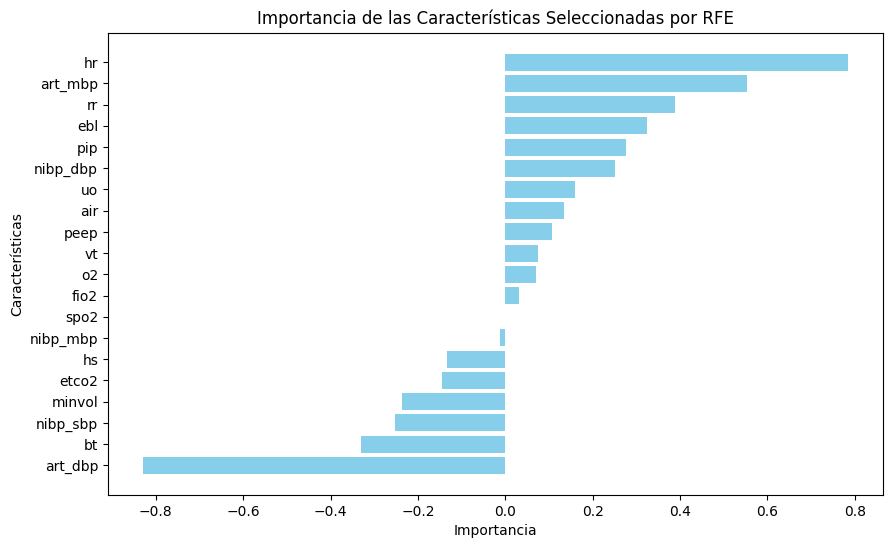

In [75]:


from sklearn.feature_selection import RFE

# Clasificador SVM
svm_model = SVC(kernel='linear')

# Aplicar RFE
rfe = RFE(estimator=svm_model, n_features_to_select=20)  # Puedes ajustar el número de características
rfe.fit(X_train, y_train)

# Características seleccionadas e importancias
selected_features = X.columns[rfe.support_]
feature_importances = rfe.estimator_.coef_[0]

# Crear un DataFrame para las características seleccionadas y sus importancias
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Gráfica de barras de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características Seleccionadas por RFE')
plt.gca().invert_yaxis()
plt.show()


#Paciente de prueba

> Agregar bloque entrecomillado



In [ ]:
paciente_158995752_di=di_data[di_data['subject_id']==158995752]
#paciente_158995752_di

In [ ]:
paciente_158995752_vi=vi_data[vi_data['subject_id']==158995752]
#paciente_158995752_vi

In [33]:
paciente_158995752_ope=ope_data[ope_data['subject_id']==158995752]
paciente_158995752_ope

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
1,446270725,158995752,257857903,NaN,0,70,M,43.0,168.0,Asian,...,1540.0,0,70555,1345.0,1540.0,NaN,NaN,1550.0,19595.0,69860.0
35,452566478,158995752,257857903,NaN,2880,70,M,43.0,174.0,Asian,...,4015.0,0,70555,3830.0,4020.0,NaN,NaN,1550.0,19595.0,69860.0
255,428885515,158995752,257857903,NaN,10080,70,M,43.0,174.0,Asian,...,11030.0,0,70555,10945.0,11035.0,NaN,NaN,1550.0,19595.0,69860.0
